# Project Overview

In [1]:
# Project Overview:
# This project analyses a movie dataset sourced from Kaggle to identify
# which variables are most strongly correlated with a film’s box office revenue.
# The primary objective is to explore relationships between features such as
# budget, votes, and gross earnings.

# Tools & Approach:
# The analysis uses Pandas for data manipulation, and Seaborn and Matplotlib
# for data visualisation. The workflow includes data loading, exploratory
# analysis, data cleaning, and correlation analysis.

# Analysis:
# Scatter plots, regression plots, and a correlation matrix are used to examine
# relationships between variables. 

# 1. Setup and Data Loading

In [117]:
# Import Libraries

import pandas as pd
import seaborn as sns 
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12, 8) # Adjust the configuration of the plots we will create

# Read in the data

df = pd.read_csv(r"C:\Users\Arsen\OneDrive - University College London\Desktop\Data Analyst\Portfolio Projects\Python Correlation Project\movies.csv")

# 2. Exploring the data

In [118]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


# 3. Data Cleaning

In [119]:
# 1. Check for missing data

for col in df.columns:
    values_missing = np.sum(df[col].isnull())
    print('{} - {}'.format(col, values_missing))


name - 0
rating - 77
genre - 0
year - 0
released - 2
score - 3
votes - 3
director - 0
writer - 3
star - 1
country - 3
budget - 2171
gross - 189
company - 17
runtime - 4


In [120]:
# Drop the rows with missing values

df = df.dropna()


In [121]:
#2. Data types for our columns 

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [122]:
# Change data types of columns (votes, budget, gross and runtime) to integer for readability 

df['votes'] = df['votes'].astype('int64')
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [123]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [124]:
# 3. Columns 'year' and 'released' do not always match.
    # We fix that by creating a new (correct) year column wth the year values form the 'release' coulm 

df['year_correct'] = df['released'].str.extract(pat = '([0-9]{4})').astype('int64')

In [125]:
# 4. Drop any duplicates 

df.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [126]:
# 5. Sorting the data by highest gross revenue

df = df.sort_values(by=['gross'], inplace = False, ascending = False)

# 4. Data Analysis: Exploring Correlations in Data

In [4]:
# Exploring what variables are correlated with the film's gross revenue
## Prediction: Budget has a high correlation

<function matplotlib.pyplot.show(close=None, block=None)>

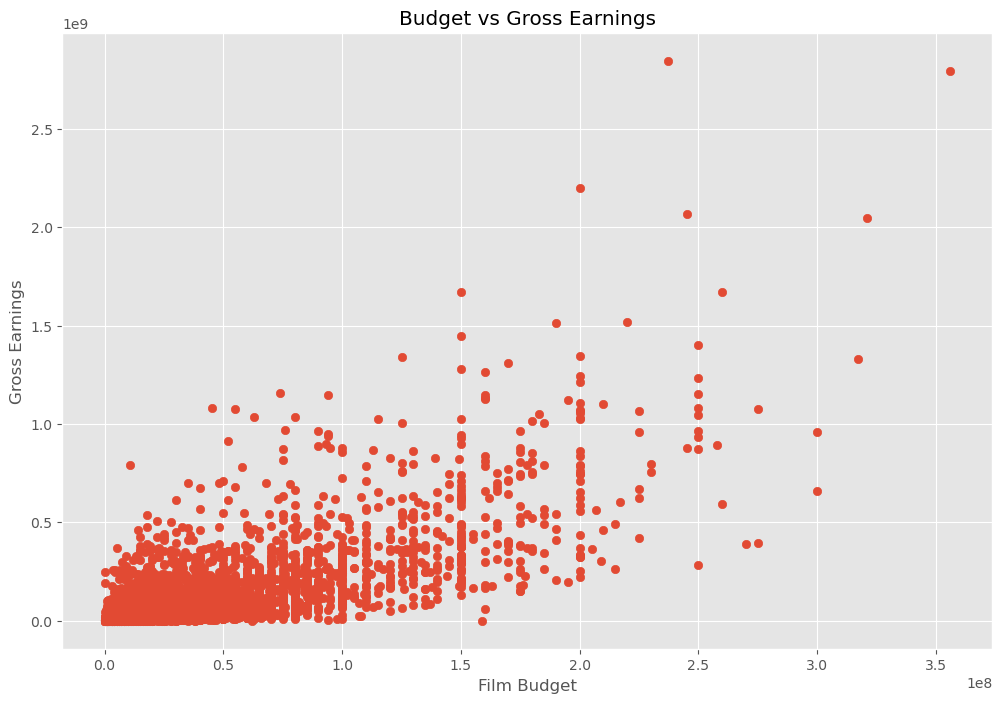

In [127]:
# 1. Scatter plot with budget vs gross 

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')

plt.xlabel('Film Budget')
plt.ylabel('Gross Earnings')

plt.show

<Axes: xlabel='budget', ylabel='gross'>

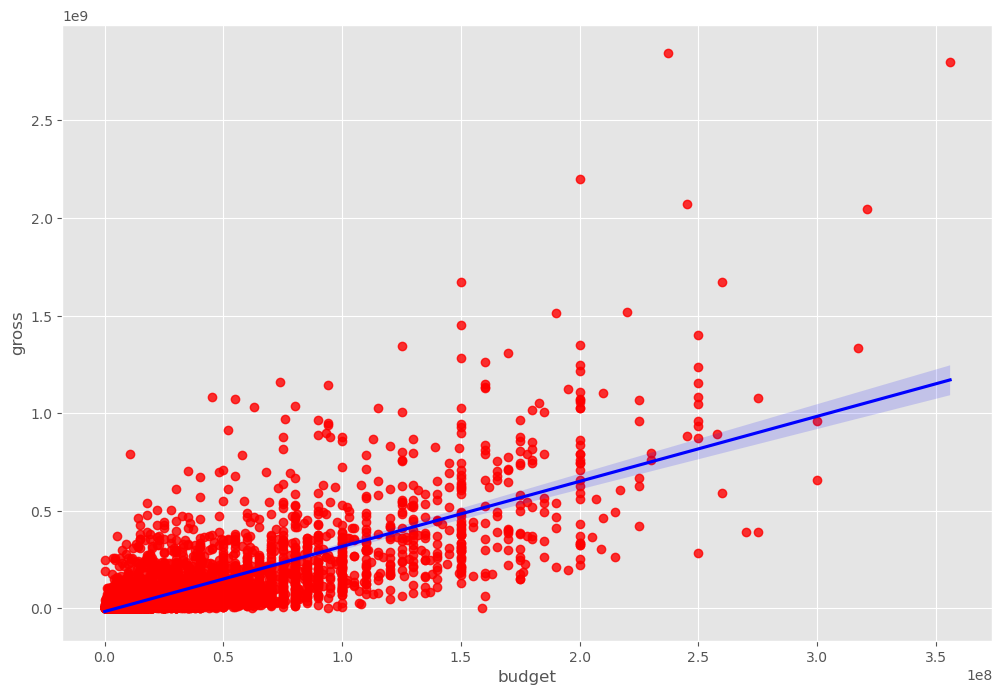

In [129]:
# 2. Regression plot budget vs gross using seaborn 

sns.regplot(x= 'budget', y = 'gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

In [130]:
# 3. Correlation Matrix

df.corr(numeric_only = True) #pearson (by default), kendall, spearman

,year,score,votes,budget,gross,runtime,year_correct
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
year_correct,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


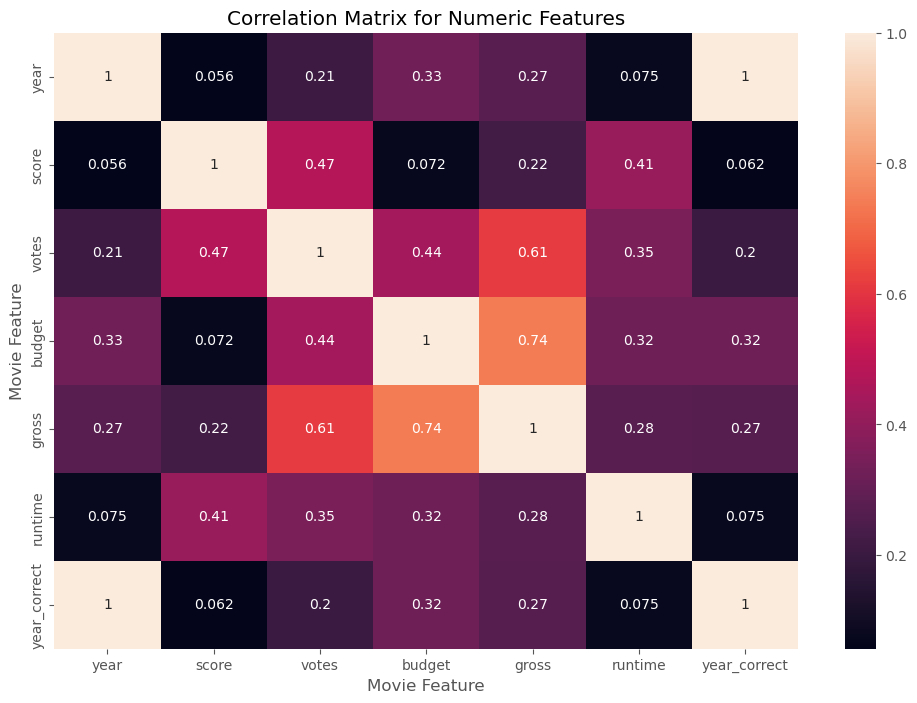

In [131]:
correlation_matrix = df.corr(numeric_only = True)

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Feature')
plt.ylabel('Movie Feature')

plt.show()

# Results

In [5]:
# The results show that a film’s budget and
# number of votes have the highest correlation with a film's gross earnings.
# Prediction that a film's budget would have a high correlation to a film's box office proved to be accurate.